### Import Library

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

### Set stopwords

In [ ]:
# Download stopwords list (only once)
nltk.download('stopwords')

# Getting Indonesian stopwords from NLTK
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Memuat Dataset

In [ ]:
# Loading dataset from CSV file
data = pd.read_csv('/content/teacher_reviews_student_performance.csv')

# Display multiple rows of data to ensure formatting
print(data.head())

                                           Sentiment    Label
0  Siswa ini menunjukkan peningkatan yang luar bi...  positif
1  Kerja kerasnya membuahkan hasil yang sangat ba...  positif
2  Ia selalu aktif bertanya di kelas dan menunjuk...  positif
3  Presentasinya sangat terstruktur dan penuh per...  positif
4  Tugas yang dikerjakan menunjukkan pemahaman ya...  positif


### Hapus stopwords

StopWord Removal

In [ ]:
# Function to remove stopwords from Sentiment
def hapus_stopwords(Sentiment):
    kata_kata = Sentiment.split()  # Breaking Sentiments into words
    kata_kata_tanpa_stopwords = [kata for kata in kata_kata if kata.lower() not in stop_words]  # Removing stopwords
    return ' '.join(kata_kata_tanpa_stopwords)  # Recombine the remaining words

# Remove stopwords from each line of Sentiment
data['Sentiment'] = data['Sentiment'].apply(hapus_stopwords)

In [ ]:
print(data.head())

                                         Sentiment    Label
0                    Siswa peningkatan matematika.  positif
1  Kerja kerasnya membuahkan hasil ujian terakhir.  positif
2                                      aktif kelas  positif
3    Presentasinya terstruktur penuh percaya diri.  positif
4                 Tugas pemahaman mendalam materi.  positif


Lowercasing

In [ ]:
# Lowercase the 'Sentiment' column
data['Sentiment'] = data['Sentiment'].str.lower()
print(data.head())

                                         Sentiment    Label
0                    siswa peningkatan matematika.  positif
1  kerja kerasnya membuahkan hasil ujian terakhir.  positif
2                                      aktif kelas  positif
3    presentasinya terstruktur penuh percaya diri.  positif
4                 tugas pemahaman mendalam materi.  positif


Punctuation Removal

In [ ]:
import re

def clean_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'Sentiment' column
data['Sentiment'] = data['Sentiment'].apply(clean_text)
print(data.head())

                                        Sentiment    Label
0                    siswa peningkatan matematika  positif
1  kerja kerasnya membuahkan hasil ujian terakhir  positif
2                                     aktif kelas  positif
3    presentasinya terstruktur penuh percaya diri  positif
4                 tugas pemahaman mendalam materi  positif


### Tokenize & Padding

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Sentiment' column contains text data and 'Performance' contains labels
sentences = data['Sentiment'].values
labels = data['Label'].values

# Split the data into training and validation sets
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(
    sentences, labels, test_size=0.2, random_state=42
)

In [ ]:
print("Train Sentences (first 5):")
print(train_sentences[:5])
print("\nTrain Labels (first 5):")
print(train_labels[:5])

print("\nValidation Sentences (first 5):")
print(validation_sentences[:5])
print("\nValidation Labels (first 5):")
print(validation_labels[:5])

Train Sentences (first 5):
['tugas usaha maksimal coba berhatihati pengerjaannya'
 'berhasil solusi brilian ini'
 'tugas terburuburu perhatikan kualitasnya teliti'
 'mengandalkan bantuan orang lain merugikanmu depan'
 'peduli tugas kelompok mengecewakan']

Train Labels (first 5):
['negatif' 'positif' 'negatif' 'negatif' 'negatif']

Validation Sentences (first 5):
['pekerjaanmu kali memuaskan benarbenar mengerjakannya penuh perhatian'
 'tugas perhatian detail coba teliti soalsoalnya'
 'sikapnya cenderung malas berdampak hasil akhirnya'
 'tugas diperbaiki berlatih menghasilkan pekerjaan baik'
 'saya serius tugas ini coba fokus']

Validation Labels (first 5):
['positif' 'negatif' 'negatif' 'negatif' 'negatif']


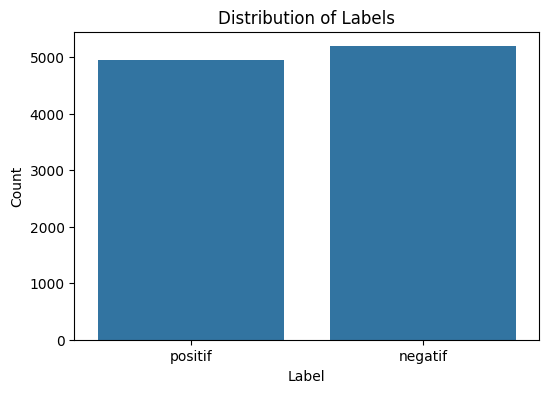

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' contains the numerical labels (0 or 1)
# Create a countplot of the labels
plt.figure(figsize=(6, 4))
sns.countplot(x=labels)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [ ]:
vocab_size = 1000  # Adjust as needed
oov_tok = "<OOV>"
padding_type = "post"
max_length = 100  # Adjust as needed

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print("Word Index (first 10):", list(word_index.items())[:10])  # Print some word index examples
print("Example training sequence:", train_sequences[0]) # Print example training sequence
print("Example padded training sequence:", train_padded[0]) # Print example padded training sequence
print("Shape of train_padded:", train_padded.shape)
print("Shape of validation_padded:", validation_padded.shape)

Word Index (first 10): [('<OOV>', 1), ('tugas', 2), ('ini', 3), ('hasil', 4), ('baik', 5), ('belajar', 6), ('kali', 7), ('kamu', 8), ('coba', 9), ('fokus', 10)]
Example training sequence: [2, 13, 38, 9, 50, 319]
Example padded training sequence: [  2  13  38   9  50 319   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Shape of train_padded: (8115, 100)
Shape of validation_padded: (2029, 100)


In [ ]:
label_mapping = {'negatif': 0, 'positif': 1}
train_labels_numerical = [label_mapping[label] for label in train_labels]
validation_labels_numerical = [label_mapping[label] for label in validation_labels]

In [ ]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Download the tokenizer file
from google.colab import files
files.download('tokenizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Train Model

In [ ]:
from tensorflow.keras import models, layers, optimizers
import tensorflow as tf

embedding_dim = 16 # Adjust as needed

model = models.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    layers.GlobalAveragePooling1D(),
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output layer with sigmoid for binary classification
])

model.compile(loss='binary_crossentropy', # Use binary_crossentropy for binary classification
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Evaluate Model

In [ ]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

import numpy as np

# Train the model with the early stopping callback
num_epochs = 55  # You can adjust the number of epochs
history = model.fit(
    train_padded,
    np.array(train_labels_numerical), # Convert train_labels_numerical to a NumPy array
    epochs=num_epochs,
    validation_data=(validation_padded, np.array(validation_labels_numerical)), # Convert validation_labels_numerical to a NumPy array
    # callbacks=[early_stopping] # Add the early stopping callback
)

Epoch 1/55
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5403 - loss: 0.6911 - val_accuracy: 0.7772 - val_loss: 0.6665
Epoch 2/55
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7111 - loss: 0.6406 - val_accuracy: 0.9054 - val_loss: 0.5119
Epoch 3/55
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8408 - loss: 0.4673 - val_accuracy: 0.9197 - val_loss: 0.3111
Epoch 4/55
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9222 - loss: 0.2802 - val_accuracy: 0.9280 - val_loss: 0.2187
Epoch 5/55
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9247 - loss: 0.2205 - val_accuracy: 0.9394 - val_loss: 0.1768
Epoch 6/55
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9444 - loss: 0.1690 - val_accuracy: 0.9325 - val_loss: 0.1747
Epoch 7/55
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9413 - loss: 0.1622 - val_accuracy: 0.8576 - val_loss: 0.3162
Epoch 8/55
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9456 - loss: 0.1493 - val_accuracy: 0.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_padded, np.array(validation_labels_numerical))  # Use validation_labels_numerical
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.0832
Validation Loss: 0.09298909455537796
Validation Accuracy: 0.9664859771728516


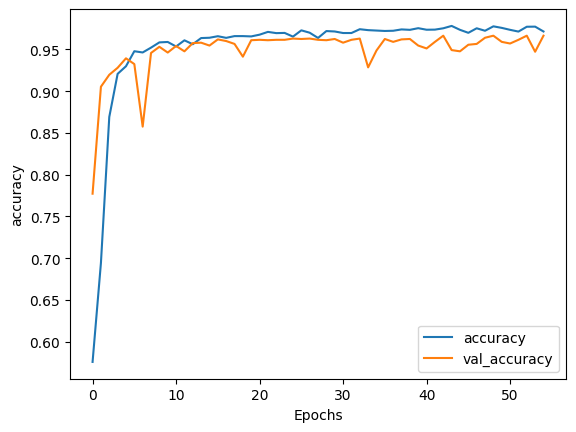

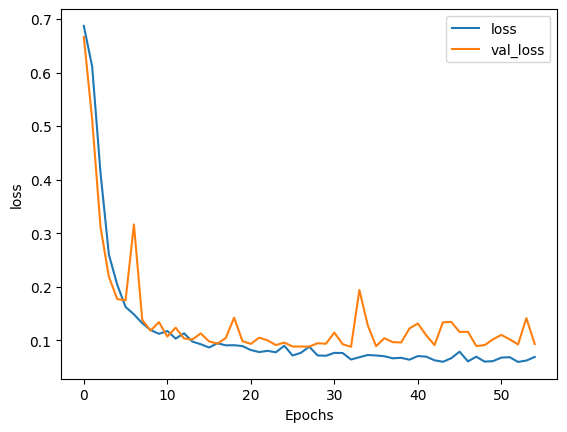

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


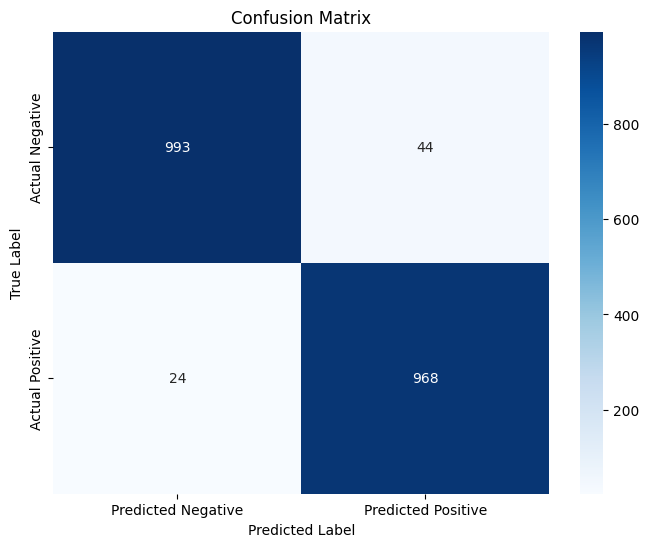

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the validation data
predictions = model.predict(validation_padded)
predicted_labels = (predictions > 0.5).astype(int) # Convert probabilities to binary labels

# Use validation_labels_numerical instead of validation_label_seq
cm = confusion_matrix(validation_labels_numerical, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Use validation_labels_numerical instead of the undefined validation_label_seq
accuracy = accuracy_score(validation_labels_numerical, predicted_labels)
print(f"Accuracy: {accuracy}")

# Generate classification report
print(classification_report(validation_labels_numerical, predicted_labels))

Accuracy: 0.9664859536717595
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1037
           1       0.96      0.98      0.97       992

    accuracy                           0.97      2029
   macro avg       0.97      0.97      0.97      2029
weighted avg       0.97      0.97      0.97      2029



In [ ]:
print(validation_sentences[0])
print(validation_labels[0])
print(validation_labels_numerical[0])  # Change this line
validation_padded[0]

pekerjaanmu kali memuaskan benarbenar mengerjakannya penuh perhatian
positif
1


array([ 33,   7,  52,  58, 157,  48,  32,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

### Prediction Model

In [ ]:
text = ["memuaskan"]

def inference(text):
  inference_sequences = tokenizer.texts_to_sequences(text)
  inference_padded = pad_sequences(inference_sequences, padding=padding_type, maxlen=max_length)
  return inference_padded

result = model.predict(inference(text))

print(f"Prediction Probability: {result[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction Probability: 0.9812098145484924


### Save Model

In [ ]:
model.save('sentiment_analysis_model.h5')

### Load Model

In [ ]:
model = load_model('sentiment_analysis_model.h5')

### Prediction

In [ ]:
def predict_sentiment(text):
    """Predicts the sentiment of a given text.

    Args:
        text: A list containing the text to analyze.

    Returns:
        A string containing the predicted sentiment ("positif" or "negatif").
    """
    # Convert text into sequence of integers
    inference_sequences = tokenizer.texts_to_sequences(text)

    # Padding sequences to ensure uniform length
    inference_padded = pad_sequences(inference_sequences, padding=padding_type, maxlen=max_length)

    # Get prediction probabilities from the model
    result = model.predict(inference_padded)

    # Predicted label: "positif" if the probability of positive class is > 0.5, else "negatif"
    predicted_sentiment = "positif" if result[0][0] > 0.5 else "negatif"

    return predicted_sentiment

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Text: Rata-rata nilai UAS sudah cukup baik, tapi masih ada beberapa bagian yang bisa ditingkatkan. Terus belajar dan berlatih, hasil yang lebih baik pasti bisa diraih!
Prediction: negatif


In [ ]:
# Example usage
text_to_predict = ["Rata-rata nilai UAS sudah cukup baik, tapi masih ada beberapa bagian yang bisa ditingkatkan. Terus belajar dan berlatih, hasil yang lebih baik pasti bisa diraih!"]
predictions = []

# Loop over the input texts and predict sentiment for each one
for text in text_to_predict:
    prediction = predict_sentiment([text])  # predict_sentiment expects a list of texts
    predictions.append(prediction)

# Print out the results
for i, text in enumerate(text_to_predict):
    print(f"Text: {text}")
    print(f"Prediction: {predictions[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Text: Rata-rata nilai UAS sudah cukup baik, tapi masih ada beberapa bagian yang bisa ditingkatkan. Terus belajar dan berlatih, hasil yang lebih baik pasti bisa diraih!
Prediction: negatif


### Load Model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('sentiment_analysis_model.h5')

### Predicted Model

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the saved model
model = load_model('sentiment_analysis_model.h5')

# Load the tokenizer
with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

padding_type = "post"
max_length = 100

def predict_sentiment(text):
    """Predicts the sentiment of a given text.

    Args:
        text: A list containing the text to analyze.

    Returns:
        A string containing the predicted sentiment ("positif" or "negatif").
    """
    inference_sequences = tokenizer.texts_to_sequences(text)
    inference_padded = pad_sequences(inference_sequences, padding=padding_type, maxlen=max_length)
    result = model.predict(inference_padded)
    predicted_sentiment = "positif" if result[0][0] > 0.5 else "negatif"
    return predicted_sentiment

# Example usage
text_to_predict = ["Rata-rata nilai UAS sudah cukup baik, tapi masih ada beberapa bagian yang bisa ditingkatkan. Terus belajar dan berlatih, hasil yang lebih baik pasti bisa diraih!"]
for text in text_to_predict:
    prediction = predict_sentiment([text])
    print(f"Text: {text}")
    print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Text: Rata-rata nilai UAS sudah cukup baik, tapi masih ada beberapa bagian yang bisa ditingkatkan. Terus belajar dan berlatih, hasil yang lebih baik pasti bisa diraih!
Prediction: negatif
